# <u style="color:blue"> CREDIT RISK ANALYSIS </u> 


### INTRODUCTION
Credit risk analysis plays a crucial role in the financial industry, enabling lenders to assess the creditworthiness of potential borrowers and make informed decisions about lending. With the increasing availability of data and advancements in machine learning techniques, credit risk analysis has seen significant improvements in accuracy and efficiency.

In this Jupyter Notebook, we will explore the process of credit risk analysis using real-world credit data. Our goal is to build a predictive model that can classify borrowers into riscky and not-riscky categories, helping financial institutions minimize losses and maximize profitability.

###  DATA OVERVIEW
The dataset used in this analysis contains information about various borrowers, including their age, income, loan intent, loan amount, and previous credit history. Additionally, it includes the loan grade, which indicates the level of risk associated with each loan application (ranging from "A" for low risk to "G" for high risk) and many more features.

# <u> Description of the data</u><br>
<table>
  <tr >
      <td style="text-align: left;"><b>feature</b></td>
    <td style="text-align: left;"><b>description</b></td>
  </tr>
  <tr>
    <td style="text-align: left;"><b>person_age</b></td>
    <td style="text-align: left;">The person's age in years</td>
  </tr>
  <tr>
    <td style="text-align: left;"><b>person_income</b></td>
    <td style="text-align: left;">The person's annual income.</td>
  </tr>
  <tr>
    <td style="text-align: left;"><b>person_home_ownership</b></td>
    <td style="text-align: left;">The type of home ownership (RENT, OWN, MORTGAGE, OTHER)</td>
  </tr>
  <tr>
    <td style="text-align: left;"><b>person_emp_length</b></td>
    <td style="text-align: left;">the person's employment length in years.</td>
  </tr>
  <tr>
    <td style="text-align: left;"><b>loan_intent</b></td>
    <td style="text-align: left;">the person's intent for the loan (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEEMPROVEMENT, DEBTCONSOLIDATION).</td>
  </tr>
  <tr>
    <td style="text-align: left;"><b>loan_grade</b></td>
    <td style="text-align: left;">the of risk on the loan(A,B,C,D,E,F,G)(A-> not riscky | G-> very riscky</td>
  </tr>
  <tr>
    <td style="text-align: left;"><b>loan_amnt</b></td>
    <td style="text-align: left;">the loan amount.</td>
  </tr>
  <tr>
    <td style="text-align: left;"><b>loan_int_rate</b></td>
    <td style="text-align: left;">the loan interest rate (between 6% and 21%)</td>
  </tr>
  <tr>
    <td style="text-align: left;"><b style="color:red">loan_status</b></td>
    <td style="text-align: left;"><span style="color:red">Shows wether the loan is currently in default with 1 being default and 0 being non-default.</span></td>
  </tr>
  <tr>
    <td style="text-align: left;"><b>loan_percent_income</b></td>
    <td style="text-align: left;">The percentage of person's income dedicated for the mortgage.</td>
  </tr>
  <tr>
    <td style="text-align: left;"><b>cb_person_default_on_file</b></td>
    <td style="text-align: left;">If the person has a default history (YES , NO).</td>
  </tr>
  <tr>
    <td style="text-align: left;"><b>cb_person_cred_hist_length</b></td>
    <td style="text-align: left;">The person's credit history.</td>
  </tr>
</table>


## Project Steps

<b>1. Exploratory Data Analysis (EDA):</b> Through EDA, we will gain insights into the distribution of various features, explore correlations, and identify potential patterns or trends.

<b>2. Data Preprocessing:</b> We will begin by cleaning and preprocessing the data to handle missing values, encode categorical variables, and prepare the data for modeling.

<b>3. Feature Selection:</b> To build an effective credit risk model, we will select relevant features and examine their impact on the target variable.

<b>4. Model Building</b> Using machine learning algorithms such as XGBoost, Random Forest, and Logistic Regression, we will train predictive models to classify borrowers as low-risk or high-risk.

<b>5. Hyperparameter Tuning:</b> Fine-tuning the model hyperparameters will help optimize their performance and make more accurate predictions.

<b>6. Model Evaluation:</b> We will evaluate the performance of each model using appropriate metrics, such as accuracy, precision, recall, and F1 score.

<b>7. Credit Risk Prediction:</b> Using the selected model, we will predict the credit risk of new loan applicants and classify them into appropriate risk categories.

<b>8. Conclusion:</b> Finally, we will summarize our findings, discuss the model's effectiveness, and provide recommendations for future improvements.

## <u style="color:red">Table of Contents </u>
* [importing and understanding the data](#chapter1)
* [cleaning the data](#chapter2)
* [Exploring and visualizing the data:](#chapter3)
    * [analysing the categorical features](#section_3_1)
    * [analysing the numirical features](#section_3_2)
    * [analysing the target feature ](#section_3_3)
* [preprocessing the data](#chapter4)
    * [checking / dealing with missing data](#section_4_1)
    * [removing outliers based on observations & domain knowledge](#section_4_2)
    * [creating the main pipeline](#section_4_3)
    * [oversampling & dealing with data imbalance](#section_4_3)
* [Training Models](#chapter5)
    * [hyperparameter tuning / performing Grid Search with cross-validation on each model  
](#section_5_1)
* [Evaluation of the Results](#chapter6)
    * [scores of the models with different metrics ('Accuracy', 'F1 Score', 'MSRE',...)](#section_6_1)
    * [Learning curve of the most performant models](#section_6_2)
    * [confusion matrix](#section_6_3)
* [pickling the best model](#chapter7)
* [webapp implimentation with Streamlit](#chapter8)
* [Conclusion](#chapter9)

In [2]:
## Basic Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import joblib
warnings.filterwarnings("ignore")
%matplotlib inline 

## For making sample data:
from sklearn.datasets import make_classification

## For Preprocessing: 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold,GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Using imblearn library:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

## Using msno Library for Missing Value analysis:
import missingno as msno

## For Metrics:
from sklearn.metrics import plot_precision_recall_curve,accuracy_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error 

## For Machine Learning Models:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

#for pickling
import pickle

## Setting the seed to allow reproducibility
np.random.seed(31415)

# 1. Importing & Understanding the Dataset <a class="anchor" id="chapter1"></a>

In [3]:
df = pd.read_csv("./credit_risk_dataset.csv")
df.head(10)

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   
6          26          77100                  RENT                8.0   
7          24          78956                  RENT                5.0   
8          24          83000                  RENT                8.0   
9          21          10000                   OWN                6.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   
5     VENTURE          A       2500           7.14            1   
6   EDUCATION          B      35000          12.42            1   
7     MEDICAL          B      35000          11.11            1   
8    PERSONAL          A      35000           8.90            1   
9     VENTURE          D       1600          14.74            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4  
5                 0.25                         N                           2  
6                 0.45                         N                           3  
7                 0.44                         N                           4  
8                 0.42                         N                           2  
9                 0.16                         N                           3

### Basic information:

In [4]:
df.shape[0],df.shape[1]

(32581, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

# 2. Cleaning the data <a class="anchor" id="chapter2"></a>

### data cleaning plan:

1- checking / removing duplicates

2- feature selection

3- removing outliers based on data knowledge & observation

4- Checking for Missing Data

- checking / removing duplicates 

In [7]:
## Checking for Duplicates
dups = df.duplicated()
dups.value_counts()

False    32416
True       165
dtype: int64

In [8]:
## Removing the Duplicates
df.drop_duplicates(inplace=True)

- <b>loan_int_rate</b> describes the Interest Rate offered on Loans by Banks or any financial institution. There is no fixed value as it varies from bank to bank. Hence I am removing this column for our analysis.

In [9]:
#drop 'interest rate' feature
df.drop(['loan_int_rate'],axis=1,inplace=True)

In [10]:
# separating the numerical/categorical features for preprocessing
ccol=df.select_dtypes(include=["object"]).columns
ncol=df.select_dtypes(include=["int","float"]).columns

print("The number of Categorical columns are:",len(ccol))
print("The number of Numerical columns are:",len(ncol))

The number of Categorical columns are: 4
The number of Numerical columns are: 7


In [11]:
#Printing the different columns with their cardinality (number of unique elements in each column):
print("The NUMERICAL columns are:\n")
for i in ncol:
    print("->",i,"-",df[i].nunique())
    
print("\n---------------------------\n")
print("The CATEGORICAL columns are:\n")
for i in ccol:
    print("->",i,"-",df[i].nunique())

The NUMERICAL columns are:

-> person_age - 58
-> person_income - 4295
-> person_emp_length - 36
-> loan_amnt - 753
-> loan_status - 2
-> loan_percent_income - 77
-> cb_person_cred_hist_length - 29

---------------------------

The CATEGORICAL columns are:

-> person_home_ownership - 4
-> loan_intent - 6
-> loan_grade - 7
-> cb_person_default_on_file - 2


In [12]:
#Checking ranges of numerical variables
for col in ncol:
    min_value = df[col].min()
    max_value = df[col].max()
    print(f'Range for {col} : [{min_value} to {max_value}]')

Range for person_age : [20 to 144]
Range for person_income : [4000 to 6000000]
Range for person_emp_length : [0.0 to 123.0]
Range for loan_amnt : [500 to 35000]
Range for loan_status : [0 to 1]
Range for loan_percent_income : [0.0 to 0.83]
Range for cb_person_cred_hist_length : [2 to 30]


# 3.Exploring and visualizing the data <a class="anchor" id="chapter3"></a>

## 3.1 Analysing Categorical features <a class="anchor" id="section_3_1"></a>

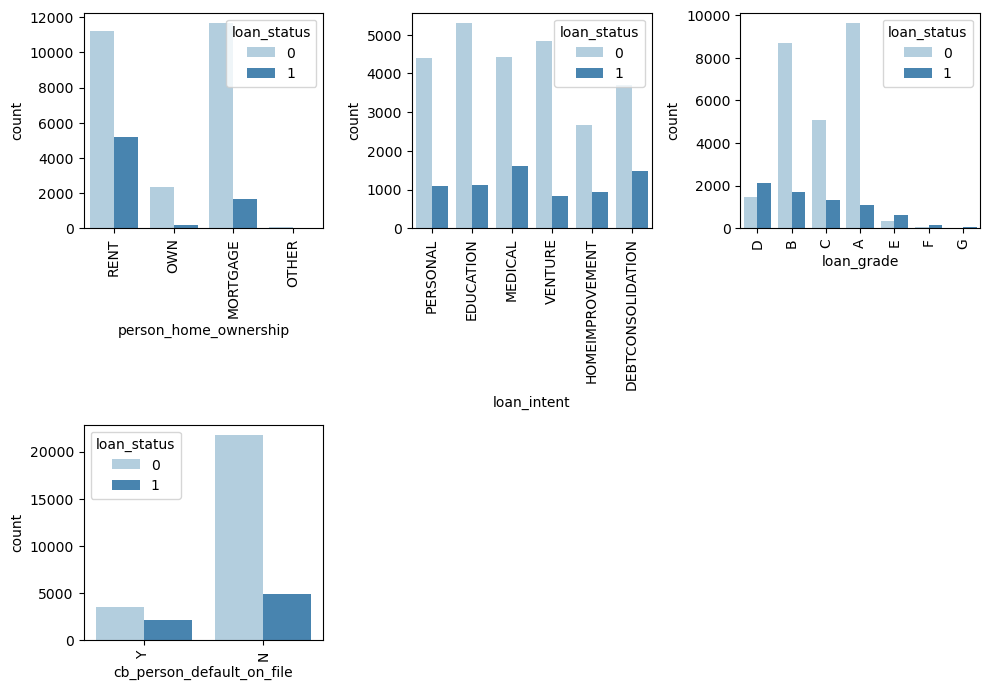

In [13]:
# plotting all the categorical features
plt.figure(figsize=(10,7))
for index, col in enumerate(ccol):
    plt.subplot(2,3, index+1)
    sns.countplot(x=col, hue='loan_status', data=df, palette='Blues')
    plt.xticks(rotation=90)
plt.tight_layout()

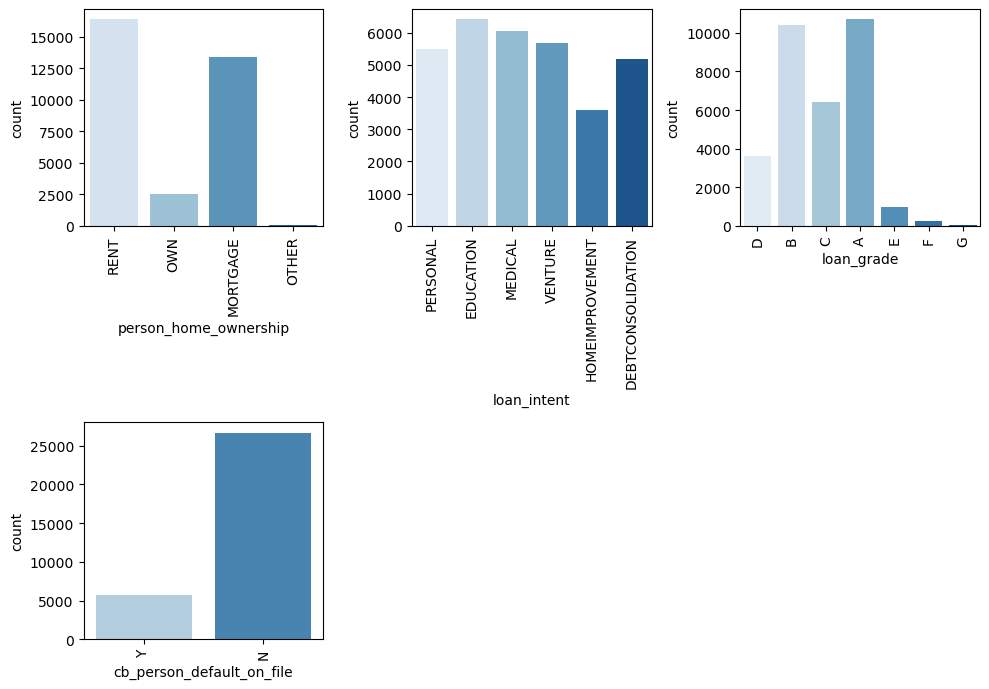

In [14]:
# Individual frequency plot
plt.figure(figsize=(10,7))
for index, col in enumerate(ccol):
    plt.subplot(2,3, index+1)
    sns.countplot(x=col, palette='Blues', data= df)
    plt.xticks(rotation=90)
plt.tight_layout()

In [15]:
# making a pie chart for loan intent feature
loan_intent_counts = df['loan_intent'].value_counts()
# Create the pie chart using Plotly
fig = px.pie(loan_intent_counts, names=loan_intent_counts.index, values=loan_intent_counts.values,
             title='Pie Chart of Loan Intent', color_discrete_sequence=px.colors.sequential.Viridis)

# Show the plot
fig.show()

In [16]:
#making a bar plot for the home-ownership feature
mean_income_by_ownership = df.groupby('person_home_ownership')['person_income'].mean().reset_index()
# Create the bar plot using Plotly
fig = px.bar(mean_income_by_ownership, x='person_home_ownership', y='person_income',
             title='Mean Person Income by Home Ownership', color='person_home_ownership',
             color_discrete_sequence=px.colors.sequential.Viridis)

# Show the plot
fig.show()

## 3.2 Analysing numerical features <a class="anchor" id="section_3_2"></a>

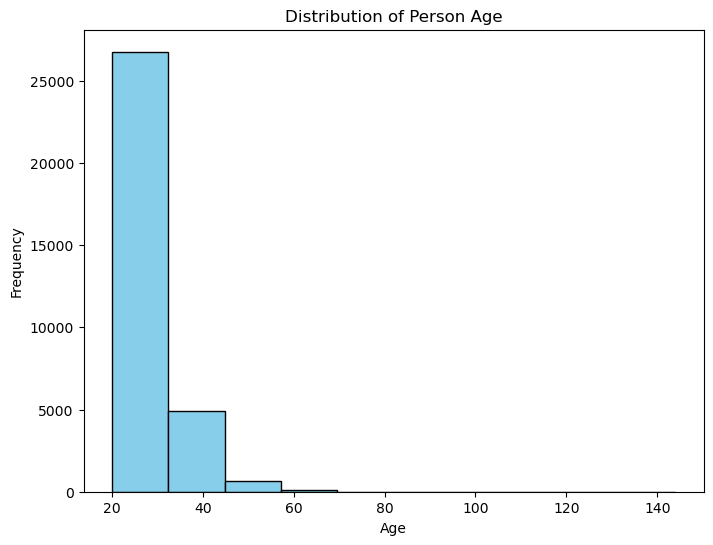

In [17]:
#plotting the distibution of the 'age' feature
plt.figure(figsize=(8, 6))
df['person_age'].plot.hist(bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Person Age')

plt.show()

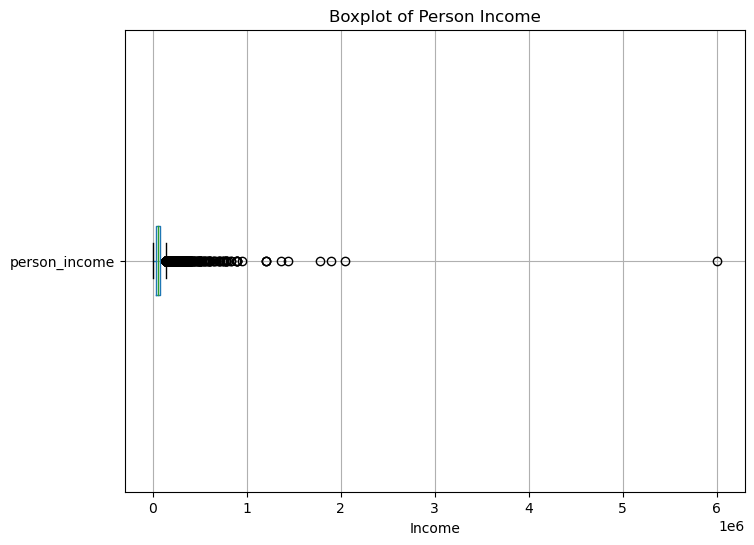

In [18]:
#plotting a boxplot for the 'person-income' feature (for outliers detection)
plt.figure(figsize=(8, 6))
df.boxplot(column='person_income', vert=False)
plt.xlabel('Income')
plt.title('Boxplot of Person Income')

plt.show()

we concider all the boorowers making more than 2M as outliers

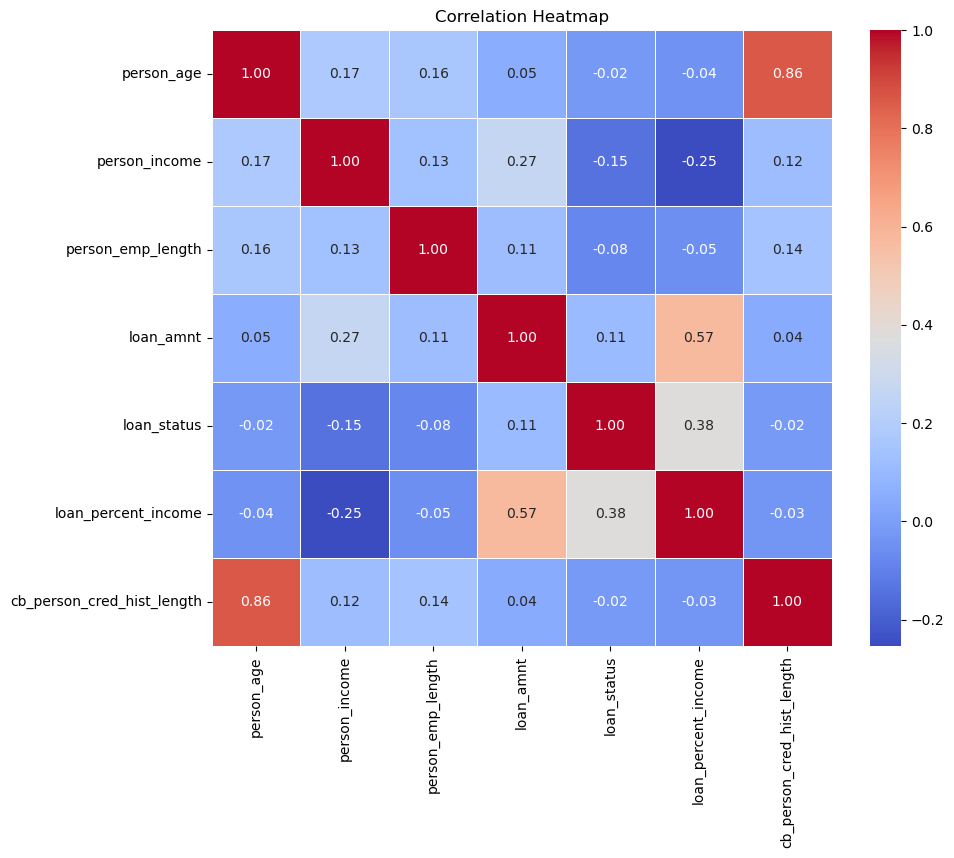

In [19]:
# making a correlation matrix to see to relations between numerical features

correlation_matrix = df.corr()
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

<b> person_age -> cb_person_cred_hist_length:</b> A strong positive correlation between a
person's age and length of credit history may indicate that older people tend to have longer
credit histories. This is usually expected because older people have had more time to establish
their credit history.

<b>loan_amount -> loan_percent_income:</b> The strong positive correlation between the amount
of the loan and the percentage of income allocated to the loan suggests that the amounts of
loans granted generally increase as the percentage of income allocated to loan repayment
increases. This may indicate that lenders give higher loan amounts to those who spend more
of their income on repayment.

<b>loan_amount -> person_income:</b> The strong positive correlation between the amount of the
loan and the person's income indicates that people with higher incomes tend to obtain higher
loan amounts. This is usually expected, as higher income may be associated with greater
repayment capacity.

<b>loan_status -> loan_percent_income:</b> The strong positive correlation between loan status
and the percentage of income allocated to the loan suggests that loans with higher income
percentages may have higher odds of defaulting.

<b>loan_status -> loan_int_rate:</b> The strong positive correlation between loan status and
interest rate indicates that loans with higher interest rates may have higher chances of
defaulting.

<b>person_income -> loan_percent_income:</b> The strong negative correlation between person
income and the percentage of income allocated to the loan indicates that people with higher
income generally allocate a smaller portion of their income to loan repayment.

In [20]:
# Create the scatter plot using Plotly
fig = px.scatter(df, x='person_age', y='person_income', 
                 title='Scatter Plot of Age vs. Income', 
                 color='person_income',
                 color_continuous_scale=px.colors.sequential.Viridis)
# Show the plot
fig.show()

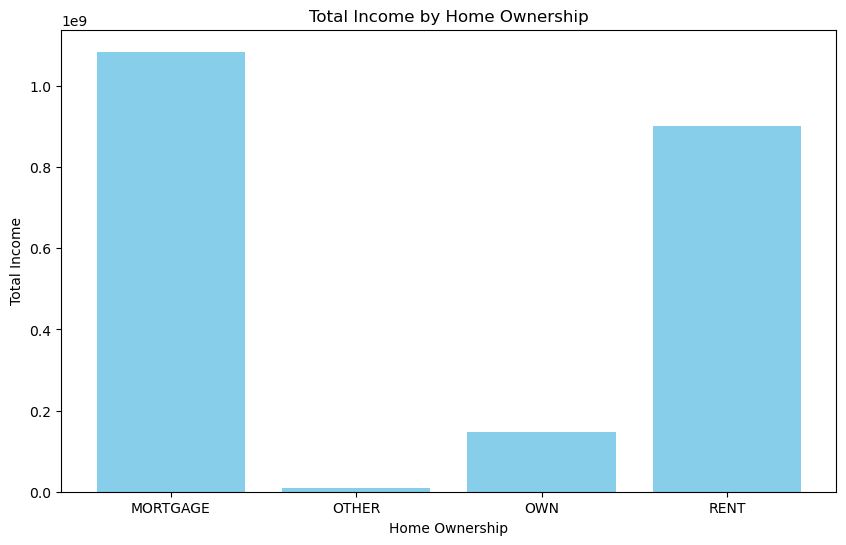

In [21]:
# Calculate the sum of 'person_income' for each category of 'person_home_ownership'
income_by_ownership = df.groupby('person_home_ownership')['person_income'].sum().reset_index()

# Get the list of categories and the total income for each category
categories = income_by_ownership['person_home_ownership']
total_income = income_by_ownership['person_income']

plt.figure(figsize=(10, 6))
plt.bar(categories, total_income, color='skyblue')
plt.xlabel('Home Ownership')
plt.ylabel('Total Income')
plt.title('Total Income by Home Ownership')

plt.show()

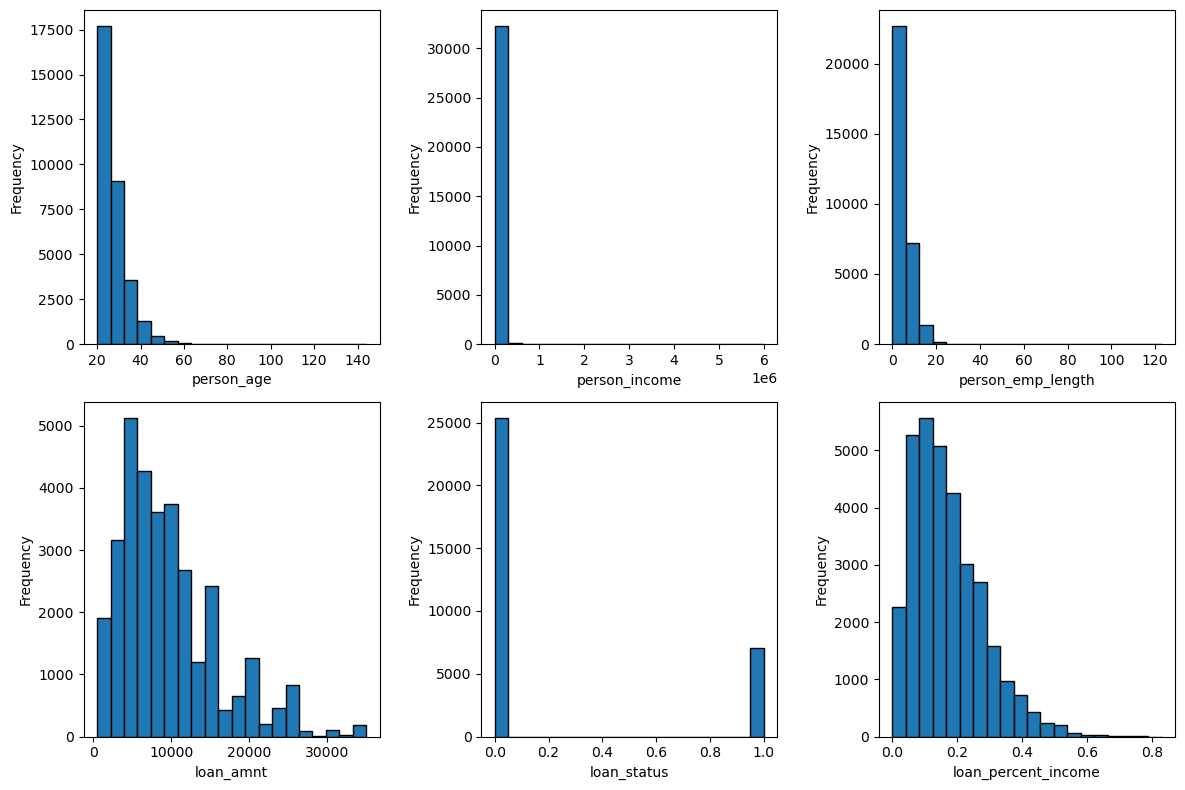

In [23]:
# Create histograms for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(ncol[:6], 1):  # Limit to 6 columns to fit in the grid
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 3.3 Analysing target feature  <a class="anchor" id="section_3_3"></a>

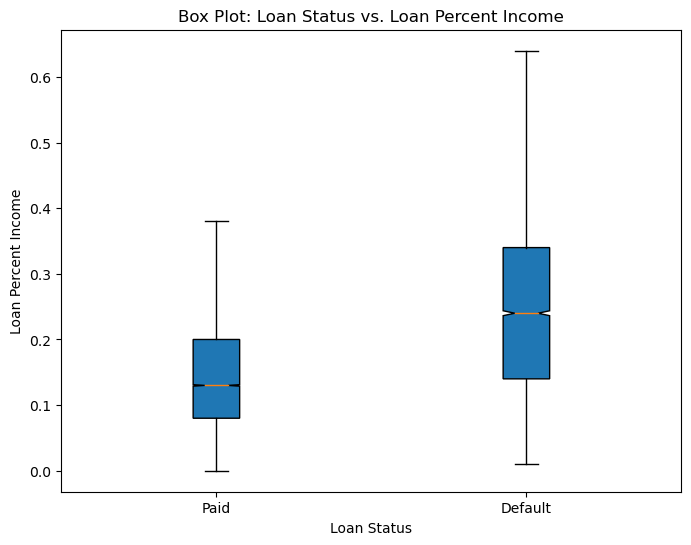

In [24]:
# Box plot: loan_status vs. loan_percent_income
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['loan_status'] == 0]['loan_percent_income'],
             df[df['loan_status'] == 1]['loan_percent_income']],
            labels=['Paid', 'Default'], showfliers=False, notch=True, patch_artist=True)
plt.xlabel('Loan Status')
plt.ylabel('Loan Percent Income')
plt.title('Box Plot: Loan Status vs. Loan Percent Income')
plt.show()

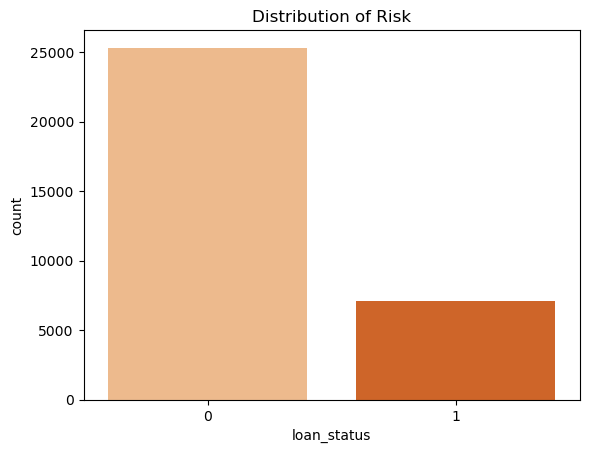

In [25]:
#ploting the distibution of risk
sns.countplot(x=df['loan_status'], palette='Oranges')
plt.title('Distribution of Risk')
plt.show()

<AxesSubplot:ylabel='loan_status'>

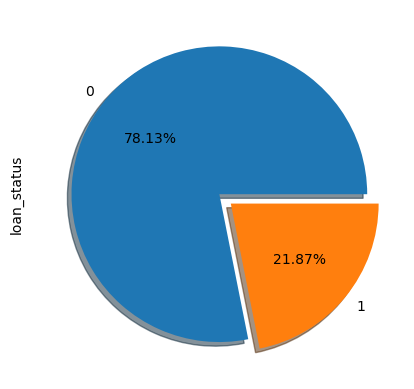

In [26]:
# pie chart whith percentages
df['loan_status'].value_counts().plot(kind='pie', autopct='%1.2f%%', explode=[0,0.1], shadow=True)

The Data is <b>highly IMBALANCED</b>. We will deal with oversampling techniques like KNN-SMOTE to solve this issue.

# 4. Preprocessing the data <a class="anchor" id="chapter4"></a>

## 4.1 Checking / dealing with missing data: <a class="anchor" id="section_4_1"></a>

Missing data, or missing values, occur when you don’t have data stored for certain variables or participants. Data can go missing due to incomplete data entry, equipment malfunctions, lost files, and many other reasons.

There are typically 3 types of missing values:

1. Missing completely at random (MCAR)

2. Missing at random (MAR)

3. Missing not at random (MNAR)

<b> Problems:</b>
Missing data are problematic because, depending on the type, they can sometimes cause sampling bias. This means your results may not be generalizable outside of your study because your data come from an unrepresentative sample.

In [27]:
df.isnull().any()

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool

In [28]:
df.isna().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             887
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

<AxesSubplot:>

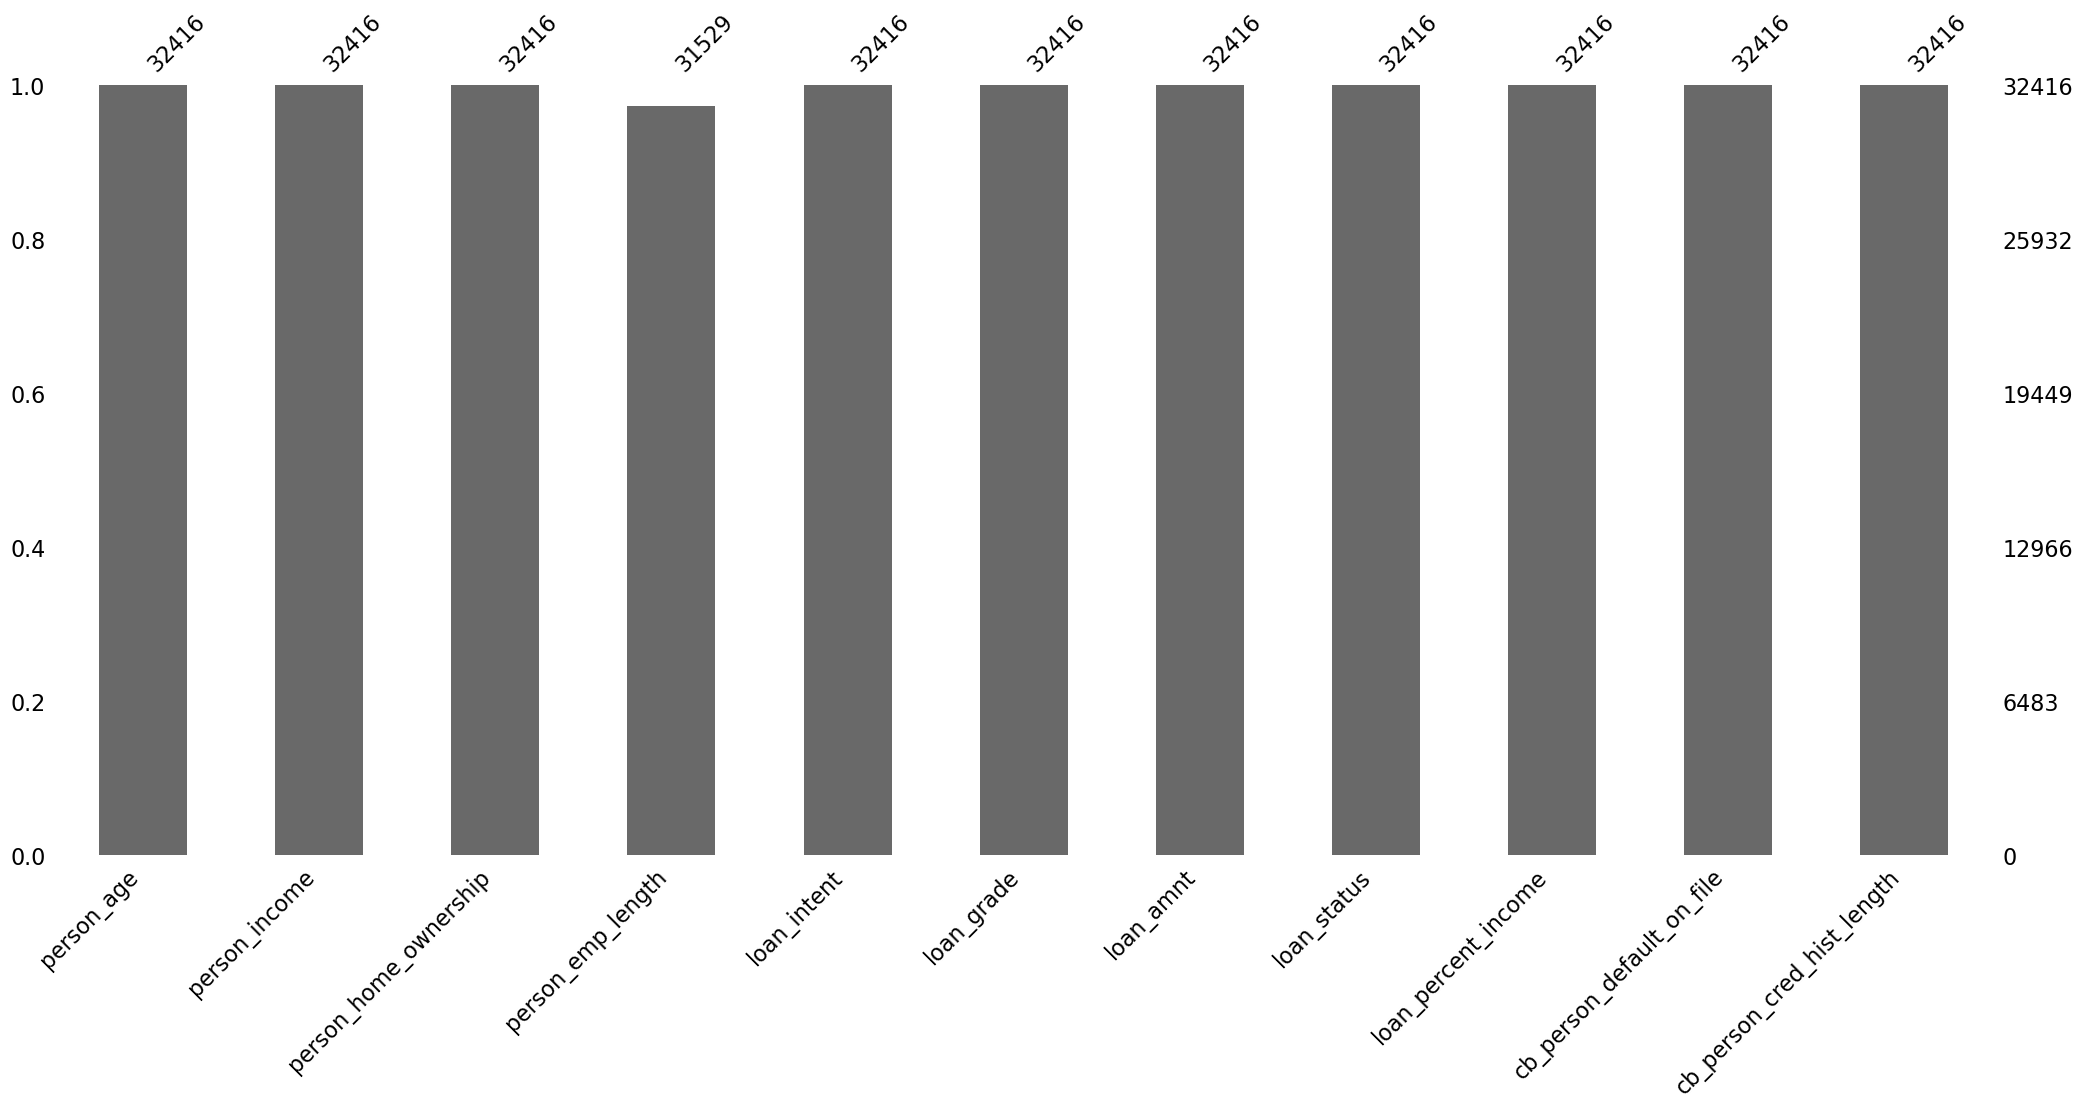

In [29]:
msno.bar(df)

<b>NOTE:</b> EVERY PREPROCESSING TECHNIQUE IS DONE ONLY ON THE TRAIN SET. SO SPLITTING IS MANDATORY BEFORE OUTLIER REMOVAL, MISSING VALUES HANDLING, OVERSAMPLING, ETC...

In [30]:
# we split the data to train / test parts
X_train, X_test, y_train, y_test = train_test_split(df.drop('loan_status', axis=1), df['loan_status'],
                                        random_state=0,  test_size=0.2, stratify=df['loan_status'],
                                        shuffle=True)

In [31]:
#print the number of unique values:
for col in X_train:
    print(col, '--->', X_train[col].nunique())
    #if the unique values are more than 20 per feature we show the percentage
    if X_train[col].nunique()<20:
        print(X_train[col].value_counts(normalize=True)*100)
    print()

person_age ---> 58

person_income ---> 3680

person_home_ownership ---> 4
RENT        50.320068
MORTGAGE    41.439149
OWN          7.916859
OTHER        0.323924
Name: person_home_ownership, dtype: float64

person_emp_length ---> 36

loan_intent ---> 6
EDUCATION            19.809502
MEDICAL              18.787598
VENTURE              17.542033
PERSONAL             16.878760
DEBTCONSOLIDATION    15.968687
HOMEIMPROVEMENT      11.013420
Name: loan_intent, dtype: float64

loan_grade ---> 7
A    32.932284
B    32.126330
C    19.902052
D    11.121394
E     3.004010
F     0.732685
G     0.181243
Name: loan_grade, dtype: float64

loan_amnt ---> 710

loan_percent_income ---> 75

cb_person_default_on_file ---> 2
N    82.392411
Y    17.607589
Name: cb_person_default_on_file, dtype: float64

cb_person_cred_hist_length ---> 29



## 4.2 Removing Outliers based on Observations & Domain Knowledge: <a class="anchor" id="section_4_2"></a>

- We can exclude clients older than 80 yo

In [32]:
X_train.loc[X_train['person_age']>=80, :]  
X_train = X_train.loc[X_train['person_age']<=80, :]  

- We can also exclude rows whose work experience is >60 (Assuming average Upper bound of employement).

In [33]:
X_train.loc[X_train['person_emp_length']>=60, :]
X_train = X_train.loc[X_train['person_emp_length']<60, :]

- we will also exclude people making more than 2M / year

In [34]:
X_train.loc[X_train['person_income']>=2000000, :]
X_train = X_train.loc[X_train['person_income']<=2000000, :]

In [35]:
# to keep the same rows between x_train and y_train (deleting from y_train the row that were deleted from x_train) 
y_train = y_train[X_train.index]
y_train.shape

(25196,)

## 4.3 Creating the main pipeline  <a class="anchor" id="section_4_3"></a>

##### The Main Pipeline will be made of two parts:

- Preprocessing for NUMERICAL VARIABLES:

1- Iterative imputer - To handle missing values

2- Scaling - To maintain the scale among features

- Preprocessing for CATEGORICAL VARIABLES:

1- One Hot Encoder - To encode each categoric for model interpretability

- Finally we apply, SMOTE - To handle imbalance in the dataset

In [36]:
#Create the main pipeline for preprocessing numerical variables:
numerical_pipeline = Pipeline([
    ('imputer', IterativeImputer()),  # Impute missing values using iterative imputer
    ('scaler', StandardScaler())     # Scale numerical features
])

In [37]:
#Create the pipeline for preprocessing categorical variables:
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())  # One-hot encode categorical features
])

In [38]:
# Replace 'numerical_features' and 'categorical_features' with lists of your numerical and categorical feature names
numerical_features = X_train.select_dtypes(include='number').columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [39]:
#Fit and transform the main pipeline on the training data:
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [40]:
def fit_preprocessing_pipeline(X_train):
    return preprocessing_pipeline.fit(X_train)

In [41]:
#saving the pipeline preprocessor 
joblib.dump(preprocessor, 'preprocessing_pipeline.pkl')

['preprocessing_pipeline.pkl']

## 4.4 over-sampling: <a class="anchor" id="section_4_4"></a>


#### dealing with data imbalance

In [42]:
#fit smote to the data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_preprocessed, y_train)

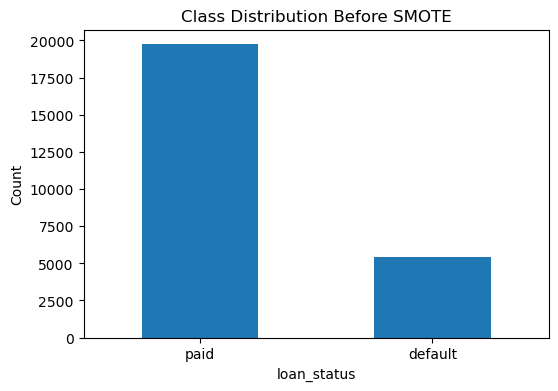

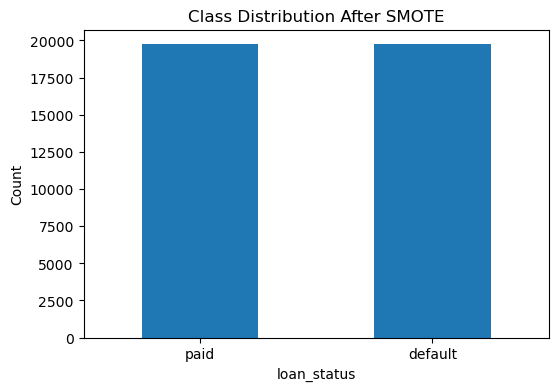

In [43]:
# Replace numeric class labels with words
class_labels_mapping = {0: 'paid', 1: 'default'}
y_train_mapped = y_train.map(class_labels_mapping)
y_train_balanced_mapped = pd.Series(y_train_balanced).map(class_labels_mapping)

# Create bar plot for class distribution before SMOTE with words
plt.figure(figsize=(6, 4))
y_train_mapped.value_counts().plot(kind='bar')
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.title('Class Distribution Before SMOTE')
plt.xticks(rotation=0)
plt.show()

# Create bar plot for class distribution after SMOTE with words
plt.figure(figsize=(6, 4))
y_train_balanced_mapped.value_counts().plot(kind='bar')
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')
plt.xticks(rotation=0)
plt.show()

In [44]:
#keeping the new balanced data in a new variable
X_test_processed = preprocessor.fit_transform(X_test)

# 5. Training models: <a class="anchor" id="chapter5"></a>

## 5.1 hyperparameter tuning / performing Grid Search with cross-validation on each model <a class="anchor" id="section_5_1"></a>

- performing Grid Search with cross-validation on each model using the specified hyperparameter grid

Model: XGBoost
Best parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300}
Best cross-validation score: 0.955

Model: Logistic Regression
Best parameters: {'C': 10}
Best cross-validation score: 0.801

Model: Neural Network
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50)}
Best cross-validation score: 0.908

Model: Random Forest
Best parameters: {'max_depth': None, 'n_estimators': 300}
Best cross-validation score: 0.948



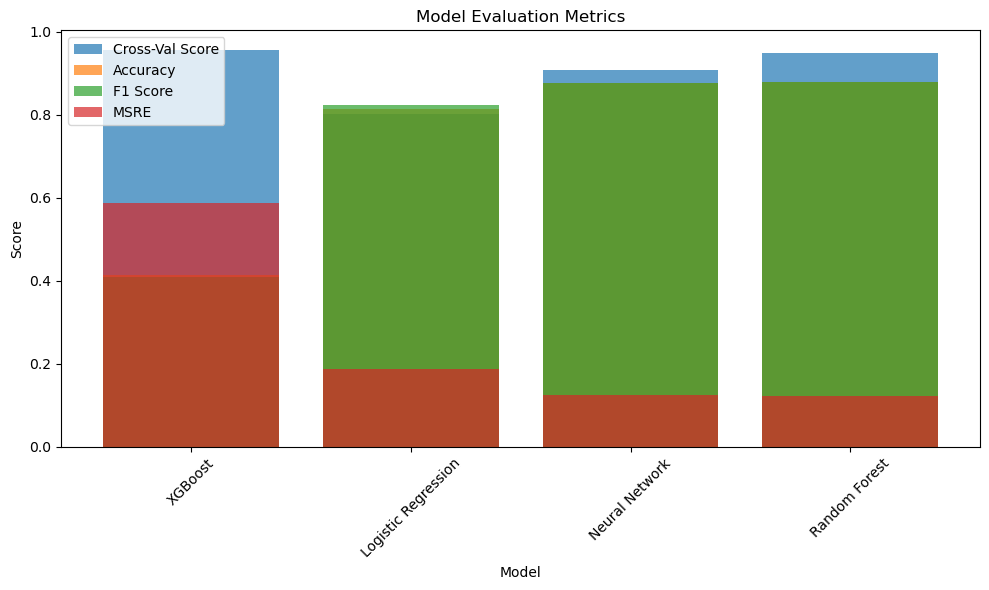

Training completed!


In [45]:
# Define the models and their respective hyperparameter grids
models = {
    'XGBoost': (XGBClassifier(), {'n_estimators': [i*100 for i in range(4)], 'max_depth': [6,8,10], 'learning_rate': [0.01, 0.05, 0.1]}),
    'Logistic Regression': (LogisticRegression(), {'C': [0.01, 0.1, 1, 10]}),
    #'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Neural Network': (MLPClassifier(), {'hidden_layer_sizes': [(100,), (100, 50)], 'activation': ['relu', 'tanh']}),
    'Random Forest': (RandomForestClassifier(random_state=0, class_weight='balanced'), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}),
}

# Define a dictionary to store the evaluation metrics for each model
evaluation_metrics = {
    'Model': [],
    'Cross-Val Score': [],
    'Accuracy': [],
    'F1 Score': [],
    'MSRE': []
}

# Create a dictionary to store the best models
best_models = {}

# Perform cross-validation and hyperparameter tuning for each model
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train_balanced, y_train_balanced)

    print(f"Model: {model_name}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.3f}\n")
    
    # Append the evaluation metrics to the dictionary
    evaluation_metrics['Model'].append(model_name)
    evaluation_metrics['Cross-Val Score'].append(grid_search.best_score_)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Store the best model in the dictionary
    best_models[model_name] = best_model

    # Predict the test set using the best model
    y_pred = best_model.predict(X_test_processed)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    evaluation_metrics['Accuracy'].append(accuracy)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    evaluation_metrics['F1 Score'].append(f1)

    # Calculate MSRE
    msre = mean_squared_error(y_test, y_pred)
    evaluation_metrics['MSRE'].append(msre)

# Convert the dictionary to a Pandas DataFrame for easy plotting
metrics_df = pd.DataFrame(evaluation_metrics)

# Plot the evaluation metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['Cross-Val Score'], label='Cross-Val Score', alpha=0.7)
plt.bar(metrics_df['Model'], metrics_df['Accuracy'], label='Accuracy', alpha=0.7)
plt.bar(metrics_df['Model'], metrics_df['F1 Score'], label='F1 Score', alpha=0.7)
plt.bar(metrics_df['Model'], metrics_df['MSRE'], label='MSRE', alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.legend()
plt.tight_layout()
plt.show()

# After the loop, training is complete
print("Training completed!")

# 6. Evaluation of the results <a class="anchor" id="chapter6"></a>

In [46]:
evaluation_metrics = pd.DataFrame(evaluation_metrics)

## 6.1 scores of the models with different metrics ('Accuracy', 'F1 Score', 'MSRE',...)<a class="anchor" id="section_6_1"></a>

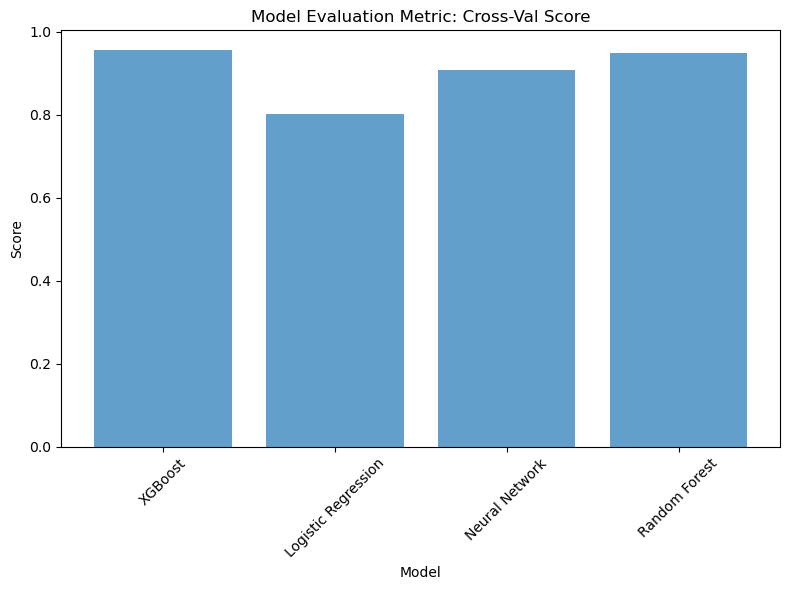

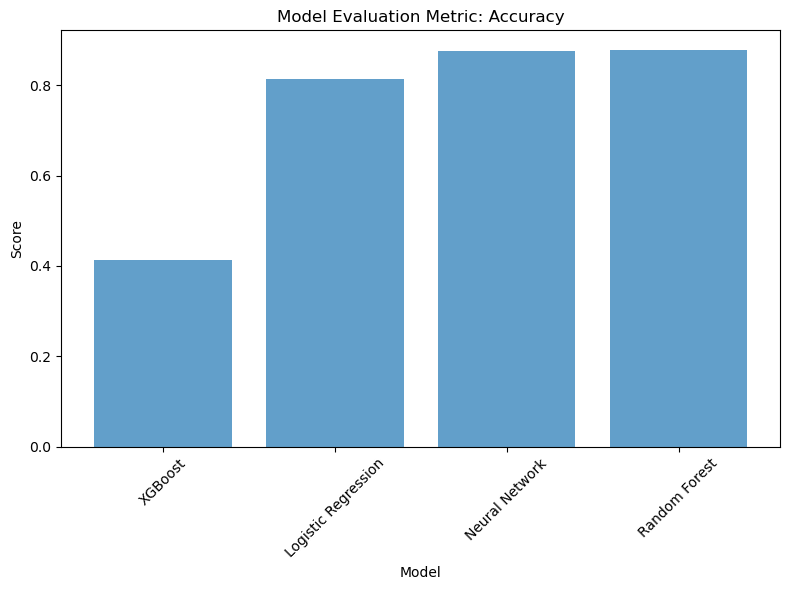

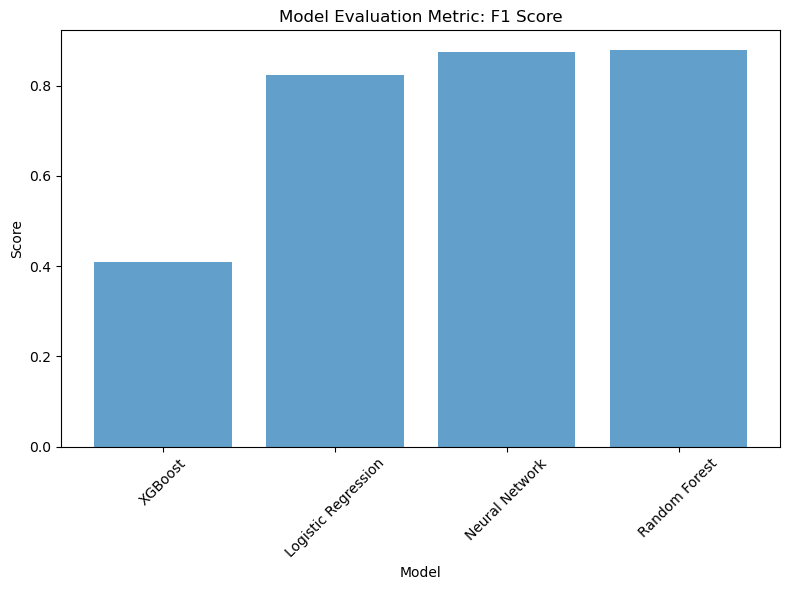

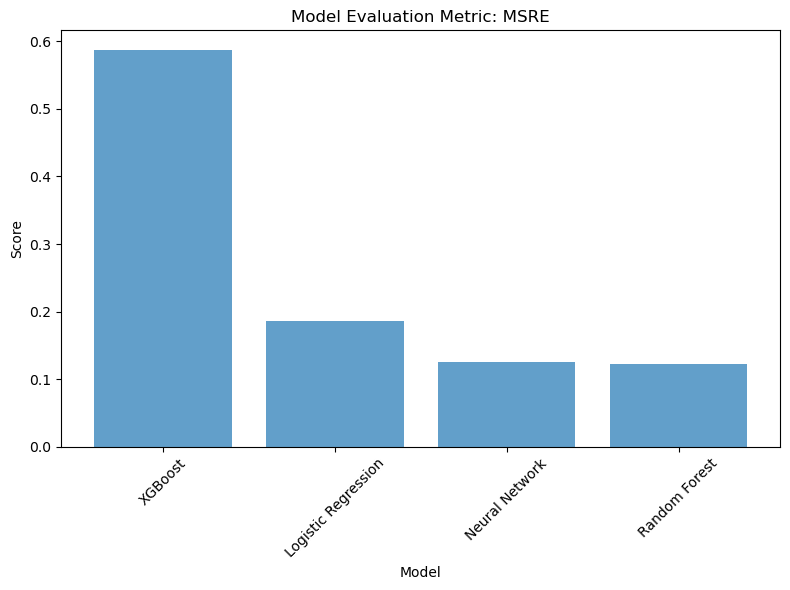

In [47]:
metrics_to_plot = ['Cross-Val Score', 'Accuracy', 'F1 Score', 'MSRE']

for metric in metrics_to_plot:
    plt.figure(figsize=(8, 6))
    plt.bar(evaluation_metrics['Model'], evaluation_metrics[metric], alpha=0.7)
    plt.xticks(rotation=45)
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title(f'Model Evaluation Metric: {metric}')
    plt.tight_layout()
    plt.show()

## 6.2 Learning curve of the most performant models<a class="anchor" id="section_6_2"></a>

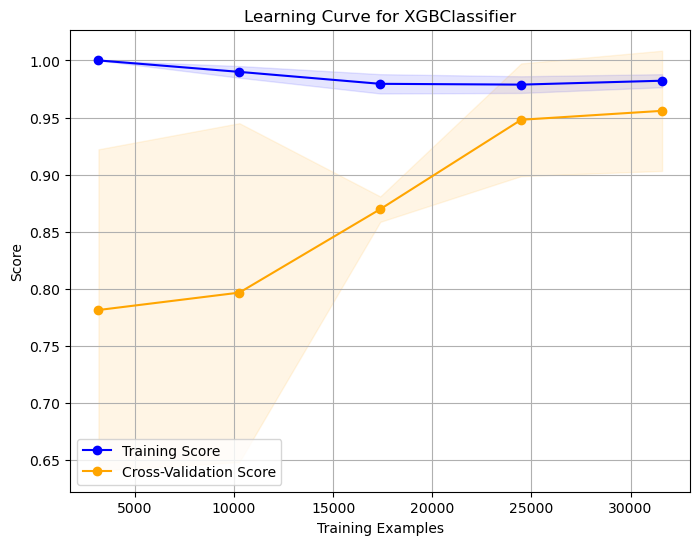

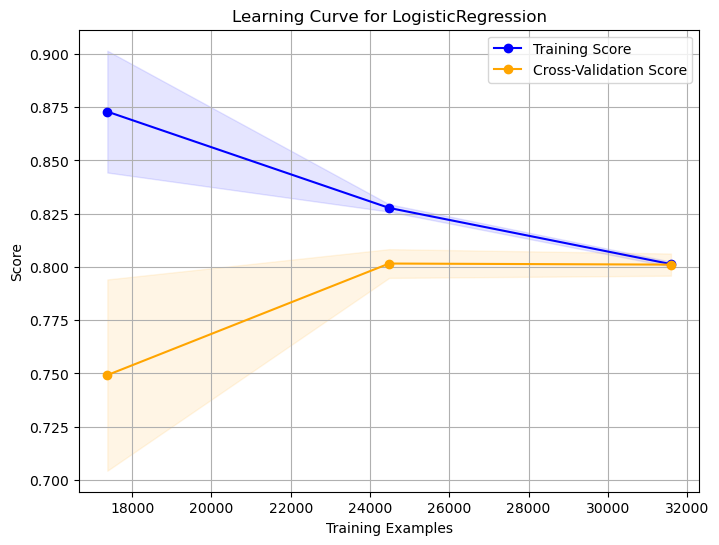

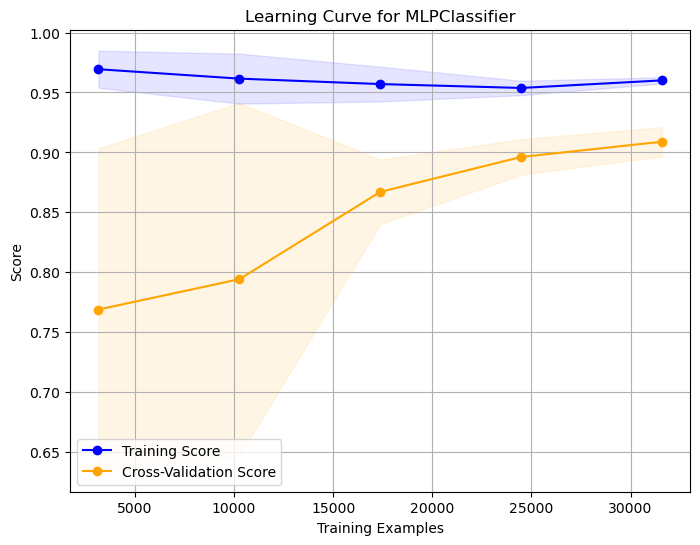

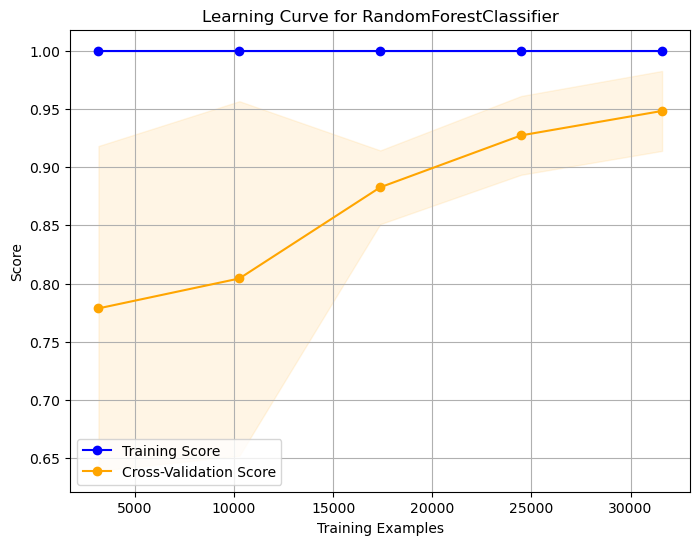

In [54]:
models = {
    'XGBoost': XGBClassifier(learning_rate = 0.1, max_depth= 8, n_estimators = 300),
    'Logistic Regression': LogisticRegression(C = 10),
    #'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Neural Network': MLPClassifier(activation = 'tanh', hidden_layer_sizes = (100, 50)),
    'Random Forest': RandomForestClassifier(random_state=0, class_weight= 'balanced',max_depth = None, n_estimators = 300)
}
# Create a function to plot the learning curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='accuracy')
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Cross-Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title(f'Learning Curve for {model.__class__.__name__}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Loop over the models and plot the learning curve for each
for model_name, model in models.items():
    plot_learning_curve(model, X_train_balanced, y_train_balanced)

## 6.3 confusion matrix <a class="anchor" id="section_6_3"></a>

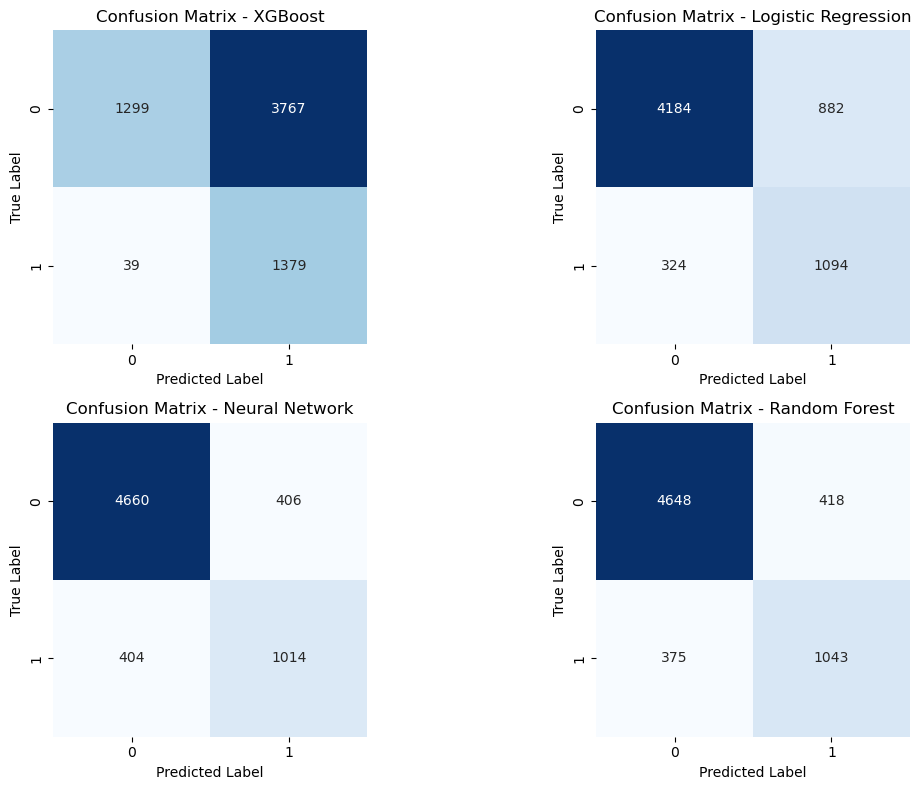

In [55]:
# Create a dictionary to store confusion matrices for each model
conf_matrices = {}

# Loop over the models and calculate the confusion matrix for each
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_processed)
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[model_name] = conf_matrix

# Plot the confusion matrices
plt.figure(figsize=(12, 8))
for i, (model_name, conf_matrix) in enumerate(conf_matrices.items()):
    plt.subplot(2, 2, i + 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
plt.tight_layout()
plt.show()

# 7. Pickling the best Model: <a class="anchor" id="chapter7"></a>

In [56]:
# Save the ML Pipeline:
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

# 8. WebApp implimentation with streamlit : <a class="anchor" id="chapter8"></a>

# 9. Conclusion: <a class="anchor" id="chapter9"></a>

in this project i have been exposed to a lot of concepts like:

    --> building a pipeline 
    
    --> hyperparameter tuning 
    
    --> evaluating models 
    
    --> building my first streamlit application 
    
    --> deploying it.

In conclusion, this credit risk analysis project demonstrates the power of data science and machine learning in the financial industry. This web app can serve as a valuable tool for financial institutions to assess credit risk, make informed lending decisions, and mitigate potential losses.

However, as with any data science project, there are a few points to keep in mind:

<b>Continuous monitoring:</b> Credit risk is a dynamic domain, and models need regular updates to adapt to changing economic conditions and borrower behaviors.

<b>Model Robustness:</b> Although the achieved accuracy is excellent, it's essential to test the model's robustness on a wider range of scenarios and data distributions.

<b>Ethical Considerations:</b> Credit risk models must be fair and unbiased. Continuously monitor for any potential bias and ensure fairness in lending decisions.

<b>Model Deployment:</b> Deploying a machine learning model in production involves careful considerations, such as scalability, security, and version control.